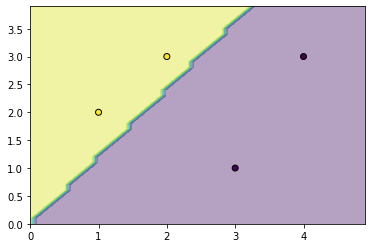

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_dim, lr=0.1):
        self.weights = np.random.randn(input_dim + 1)
        self.lr = lr

    def predict(self, inputs):
        inputs = np.append(inputs, 1.0)
        activation = np.dot(self.weights, inputs)
        return np.where(activation > 0, 1, -1)

    def train(self, inputs, targets, epochs):
        for epoch in range(epochs):
            for i, x in enumerate(inputs):
                target = targets[i]
                prediction = self.predict(x)
                if prediction != target:
                    error = target - prediction
                    inputs_with_bias = np.append(x, 1.0)
                    self.weights += self.lr * error * inputs_with_bias

    def plot_decision_regions(self, inputs, targets):
        x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
        y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = np.array([self.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, edgecolors='black')
        plt.show()

# example usage
inputs = np.array([[1, 2], [2, 3], [3, 1], [4, 3]])
targets = np.array([1, 1, -1, -1])
perceptron = Perceptron(input_dim=2)
perceptron.train(inputs, targets, epochs=10)
perceptron.plot_decision_regions(inputs, targets)
